In [56]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


pd.options.display.width = None
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
reviews = pickle.load(open('reviews_of_all_papers2.pkl', 'rb'))

In [8]:
lengths = [len(rev) for pid, rev in reviews.items()]    

(array([  37.,   21.,   24.,  646., 1959.,  295.,   12.,    2.,    4.,
           0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <BarContainer object of 11 artists>)

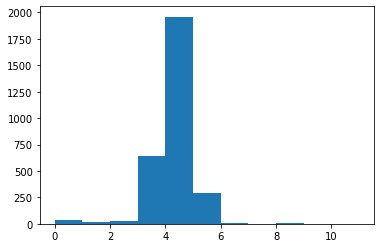

In [24]:
plt.hist(lengths, bins=range(12))

In [11]:
pids = reviews.keys()

In [14]:
sample = list(pids)[-1]
reviews[sample]

[{'summary_paper': "The paper studies the problem of federated learning when some clients' data is unlabeled. In addition, some of the classes are unlabeled while others are positive classes. The paper proposes an algorithm called FedPU and the authors provide an alaysis to obtain the generalization bound for the proposed algorithm.",
  'main_review': 'The problem which is studied in this paper is interesting and important.\n suggestions/ weaknesses/ questions:\n 1- The paper states that "Note that different clients have different set of positive classes, and all of the positive classes should cover the whole classes in the dataset." This assumption is quite restrictive which does not necessarily hold in practical scenarios.\n 2- The paper studies the problem that positive classes can be different across different clients. In such cases, one idea is to personalize the federated learning algorithm to better deal with this issue. However, in the paper this issue does not discuss that why

# recommendations

In [61]:
def summarize_reviews(revs):
    scores = []
    for r in revs:
        try:
            scores.append(r['recommendation'])
        except:
            pass
    if not scores:
        return {'mean': np.nan,
           'max': np.nan,
           'min': np.nan,
            'std': np.nan,
           'median': np.nan,
               'num': np.nan}
    return {'mean': np.mean(scores),
           'max': np.max(scores),
           'min': np.min(scores),
            'std': np.std(scores),
           'median': np.median(scores),
           'num': len(scores)}


In [62]:
stats = []
for pid, rev in reviews.items():
    single_stat = summarize_reviews(rev)
    single_stat['pid'] = pid
    stats.append(single_stat)

In [64]:
df = pd.DataFrame.from_records(stats)
df = df.set_index('pid')
display(df.head())

,mean,max,min,std,median,num
pid,,,,,,
6yVvwR9H9Oj,6.666667,8.0,6.0,0.942809,6.0,3.0
nUoI0DKg_Ti,3.750000,6.0,3.0,1.299038,3.0,4.0
NJTRDt9TPb,5.000000,6.0,3.0,1.414214,6.0,3.0
yeP_zx9vqNm,6.000000,8.0,5.0,1.224745,5.5,4.0
oSP1hwZB24,4.666667,6.0,3.0,1.247219,5.0,3.0


(array([ 13.,  21., 162., 249., 473., 717., 723., 360., 161.,  63.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

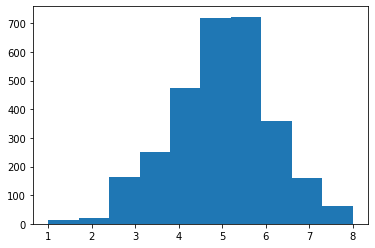

In [65]:
plt.hist(df['mean'])

(array([208., 402., 303., 705., 786., 240., 220.,  39.,  26.,  13.]),
 array([0.        , 0.30310889, 0.60621778, 0.90932667, 1.21243557,
        1.51554446, 1.81865335, 2.12176224, 2.42487113, 2.72798002,
        3.03108891]),
 <BarContainer object of 10 artists>)

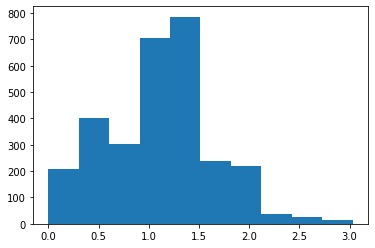

In [33]:
plt.hist(df['std'])

(array([  17.,   11.,  467.,    0.,  336., 1008.,  387.,  508.,  102.,
         106.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

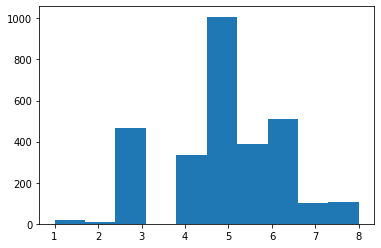

In [30]:
plt.hist(df['median'])

(array([   2.,    0.,  152.,    0.,  643., 1189.,    0.,  921.,    0.,
          35.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

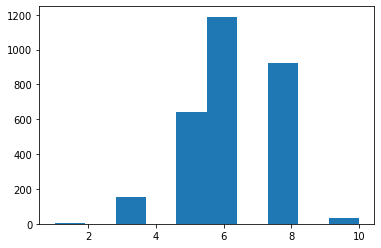

In [31]:
plt.hist(df['max'])

(array([ 203.,    0., 1713.,    0.,    0.,  856.,    0.,  146.,    0.,
          24.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

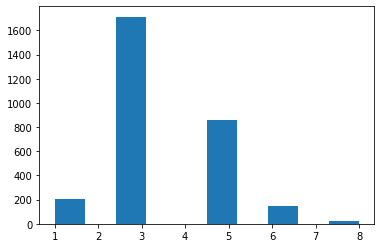

In [32]:
plt.hist(df['min'])

In [66]:
pap_df = pd.read_csv('paperlist.tsv', sep='\t', index_col=0)

In [70]:
df2 = pap_df.join(df)
df2.head(2)

,title,link,keywords,abstract,mean,max,min,std,median,num
paper_id,,,,,,,,,,
6yVvwR9H9Oj,On Non-Random Missing Labels in Semi-Supervised Learning,https://openreview.net/forum?id=6yVvwR9H9Oj,"Semi-Supervised Learning, Missing Not At Random, Image Classification","Semi-Supervised Learning (SSL) is fundamentally a missing label problem, in which the label Missing Not At Random (MNAR) problem is more realistic and challenging, compared to the widely-adopted yet naive Missing Completely At Random assumption where both labeled and unlabeled data share the same class distribution. Different from existing SSL solutions that overlook the role of ''class'' in causing the non-randomness, e.g., users are more likely to label popular classes, we explicitly incorporate ''class'' into SSL. Our method is three-fold: 1) We propose Class-Aware Propensity (CAP) that exploits the unlabeled data to train an improved classifier using the biased labeled data. 2) To encourage rare class training, whose model is low-recall but high-precision that discards too many pseudo-labeled data, we propose Class-Aware Imputation (CAI) that dynamically decreases (or increases) the pseudo-label assignment threshold for rare (or frequent) classes. 3) Overall, we integrate CAP and CAI into a Class-Aware Doubly Robust (CADR) estimator for training an unbiased SSL model. Under various MNAR settings and ablations, our method not only significantly outperforms existing baselines, but also surpasses other label bias removal SSL methods.",6.666667,8.0,6.0,0.942809,6.0,3.0
nUoI0DKg_Ti,Learning Sampling Policy for Faster Derivative Free Optimization,https://openreview.net/forum?id=nUoI0DKg_Ti,"Derivative free optimization, reinforcement learning","Zeroth-order (ZO, also known as derivative-free) methods, which estimate a noisy gradient based on the finite difference with two function evaluations, have attracted much attention recently because of its broad applications in machine learning community. The function evaluations are normally requested on a point plus a random perturbations drawn from a (standard Gaussian) distribution. The accurateness of noisy gradient highly depends on how many perturbations randomly sampled from the distribution, which intrinsically conflicts to the efficiency of ZO algorithms. Although there have been much effort made to improve the efficiency of ZO algorithms, however, we explore a new direction, i.e., learn an optimal sampling policy based on reinforcement learning (RL) to generate perturbation instead of using totally random strategy, which make it possible to calculate a ZO gradient with only 2 function evaluations. Specifically, we first formulate the problem of learning a sampling policy as a Markov decision process. Then, we propose our ZO-RL algorithm, i.e., using deep deterministic policy gradient, an actor-critic RL algorithm to learn a sampling policy which can guide the generation of perturbed vectors in getting ZO gradients as accurate as possible. Since our method only affects the generation of perturbed vectors which is parallel to existing efforts of accelerating ZO methods such as learning a data driven Gaussian distribution, we show how to combine our method with other acceleration techniques to further improve the efficiency of ZO algorithms. Experimental results with different ZO estimators show that our ZO-RL algorithm can effectively reduce the query complexity of ZO algorithms especially in the later stage of the optimization process, and converge faster than existing ZO algorithms.",3.750000,6.0,3.0,1.299038,3.0,4.0


In [71]:
len(df2[df2['mean'].isna()])

58

In [72]:
df2 = df2.dropna()
df2 = df2.drop(columns='abstract')

## best papers by median score

In [73]:
df2.sort_values(by='median', ascending=False).head(50)

,title,link,keywords,mean,max,min,std,median,num
paper_id,,,,,,,,,
LdlwbBP2mlq,Minibatch vs Local SGD with Shuffling: Tight Convergence Bounds and Beyond,https://openreview.net/forum?id=LdlwbBP2mlq,"Local SGD, Minibatch SGD, Shuffling, Without-replacement, Convex Optimization, Stochastic Optimization, Federated Learning, Large Scale Learning, Distributed Learning",8.000000,8.0,8.0,0.000000,8.0,3.0
iMSjopcOn0p,MT3: Multi-Task Multitrack Music Transcription,https://openreview.net/forum?id=iMSjopcOn0p,"music transcription, transformer, multi-task learning, low resource learning, music understanding, music information retrieval",8.000000,8.0,8.0,0.000000,8.0,4.0
BrPdX1bDZkQ,DemoDICE: Offline Imitation Learning with Supplementary Imperfect Demonstrations,https://openreview.net/forum?id=BrPdX1bDZkQ,"imitation learning, offline imitation learning, imperfect demonstration, non-expert demonstration",7.333333,8.0,6.0,0.942809,8.0,3.0
sOK-zS6WHB,Responsible Disclosure of Generative Models Using Scalable Fingerprinting,https://openreview.net/forum?id=sOK-zS6WHB,"Generative models, fingerprinting, responsible disclosure, deep fake detection and attribution",6.400000,8.0,3.0,2.059126,8.0,5.0
bVvMOtLMiw,DIVA: Dataset Derivative of a Learning Task,https://openreview.net/forum?id=bVvMOtLMiw,"Leave one out cross validation, AutoML, dataset optimization",7.000000,8.0,5.0,1.414214,8.0,3.0
lrocYB-0ST2,Approximation and Learning with Deep Convolutional Models: a Kernel Perspective,https://openreview.net/forum?id=lrocYB-0ST2,"kernel methods, deep learning theory, convolution, approximation, generalization",7.500000,8.0,6.0,0.866025,8.0,4.0
siCt4xZn5Ve,What Happens after SGD Reaches Zero Loss? --A Mathematical Framework,https://openreview.net/forum?id=siCt4xZn5Ve,"SGD, implicit bias, generalization, deep learning, implicit regularization, manifold",8.000000,10.0,6.0,1.414214,8.0,4.0
0DLwqQLmqV,NAS-Bench-Suite: NAS Evaluation is (Now) Surprisingly Easy,https://openreview.net/forum?id=0DLwqQLmqV,"neural architecture search, AutoML",7.500000,8.0,6.0,0.866025,8.0,4.0
K0E_F0gFDgA,The MultiBERTs: BERT Reproductions for Robustness Analysis,https://openreview.net/forum?id=K0E_F0gFDgA,"Pre-trained models, BERT, bootstrapping, hypothesis testing, robustness",7.333333,8.0,6.0,0.942809,8.0,3.0


## best papers by mean score

In [74]:
df2.sort_values(by='mean', ascending=False).head(50)

,title,link,keywords,mean,max,min,std,median,num
paper_id,,,,,,,,,
LI2bhrE_2A,Iterative Refinement Graph Neural Network for Antibody Sequence-Structure Co-design,https://openreview.net/forum?id=LI2bhrE_2A,"Drug Discovery, Antibody Design, Generative Models, Graph Generation",8.000000,8.0,8.0,0.000000,8.0,3.0
WvOGCEAQhxl,Assessing Generalization of SGD via Disagreement,https://openreview.net/forum?id=WvOGCEAQhxl,"Generalization, Deep Learning, Empirical Phenomenon, Accuracy Estimation, Stochastic Gradient Descent",8.000000,8.0,8.0,0.000000,8.0,4.0
Z7Lk2cQEG8a,The Hidden Convex Optimization Landscape of Regularized Two-Layer ReLU Networks: an Exact Characterization of Optimal Solutions,https://openreview.net/forum?id=Z7Lk2cQEG8a,"Neural networks, global optimization, convex optimization, convex analysis",8.000000,8.0,8.0,0.000000,8.0,4.0
AUGBfDIV9rL,Emergent Communication at Scale,https://openreview.net/forum?id=AUGBfDIV9rL,"emergent communication, multi-agent reinforcement learning, representation learning",8.000000,8.0,8.0,0.000000,8.0,4.0
b-ny3x071E5,Bootstrapped Meta-Learning,https://openreview.net/forum?id=b-ny3x071E5,"meta-learning, meta-gradients, meta-reinforcement learning",8.000000,8.0,8.0,0.000000,8.0,4.0
O50443AsCP,TAPEX: Table Pre-training via Learning a Neural SQL Executor,https://openreview.net/forum?id=O50443AsCP,"table pre-training, sythetic pre-training, SQL execution, table-based question answering, table-based fact verification",8.000000,8.0,8.0,0.000000,8.0,3.0
iMSjopcOn0p,MT3: Multi-Task Multitrack Music Transcription,https://openreview.net/forum?id=iMSjopcOn0p,"music transcription, transformer, multi-task learning, low resource learning, music understanding, music information retrieval",8.000000,8.0,8.0,0.000000,8.0,4.0
gEZrGCozdqR,Finetuned Language Models are Zero-Shot Learners,https://openreview.net/forum?id=gEZrGCozdqR,"natural language processing, zero-shot learning, language models",8.000000,8.0,8.0,0.000000,8.0,4.0
0RDcd5Axok,Towards a Unified View of Parameter-Efficient Transfer Learning,https://openreview.net/forum?id=0RDcd5Axok,"parameter-efficient transfer learning, unified view, natural language processing",8.000000,10.0,6.0,1.632993,8.0,3.0


## most controversial papers by std of score

In [75]:
df2.sort_values(by='std', ascending=False).head(50)

,title,link,keywords,mean,max,min,std,median,num
paper_id,,,,,,,,,
p0rCmDEN_-,Visual hyperacuity with moving sensor and recurrent neural computations,https://openreview.net/forum?id=p0rCmDEN_-,"visual system, convolutional neural networks, recurrent neural networks, active vision, active sensing, ocular drift",4.750000,10.0,3.0,3.031089,3.0,4.0
FPGs276lUeq,Palette: Image-to-Image Diffusion Models,https://openreview.net/forum?id=FPGs276lUeq,"machine learning, artificial intelligence, computer vision",4.750000,10.0,3.0,3.031089,3.0,4.0
SC6JbEviuD0,White Paper Assistance: A Step Forward Beyond the Shortcut Learning,https://openreview.net/forum?id=SC6JbEviuD0,"Shortcut Learning, Bias, Classification, Imbalanced Classification, Robustness",3.750000,8.0,1.0,2.947457,3.0,4.0
7IWGzQ6gZ1D,Constructing a Good Behavior Basis for Transfer using Generalized Policy Updates,https://openreview.net/forum?id=7IWGzQ6gZ1D,"reinforcement learning, lifelong learning, transfer learning, successor features",6.000000,10.0,3.0,2.943920,5.0,3.0
JGO8CvG5S9,Universal Approximation Under Constraints is Possible with Transformers,https://openreview.net/forum?id=JGO8CvG5S9,"Constrained Universal Approximation, Probabilistic Attention, Transformer Networks, Geometric Deep Learning, Measurable Maximum Theorem, Non-Affine Random Projections, Optimal Transport.",7.000000,10.0,3.0,2.943920,8.0,3.0
3ILxkQ7yElm,Learning Continuous Environment Fields via Implicit Functions,https://openreview.net/forum?id=3ILxkQ7yElm,"Continuous Scene Representation, Implicit Neural Networks",5.000000,8.0,1.0,2.943920,6.0,3.0
V1MBgNBx5E,Mask and Understand: Evaluating the Importance of Parameters,https://openreview.net/forum?id=V1MBgNBx5E,"influence function, interpretability, model pruning, feature importance ranking",4.000000,8.0,1.0,2.943920,3.0,3.0
TQ75Md-FqQp,Efficient and Modular Implicit Differentiation,https://openreview.net/forum?id=TQ75Md-FqQp,"implicit differentiation, bilevel optimization, autodiff, jax",6.333333,10.0,3.0,2.867442,6.0,3.0
MeMMmuWRXsy,Robust Robotic Control from Pixels using Contrastive Recurrent State-Space Models,https://openreview.net/forum?id=MeMMmuWRXsy,"contrastive learning, model-based RL, distractions, predictive coding",4.666667,8.0,1.0,2.867442,5.0,3.0
